# Data Analysis and Preprocessing For Fraud Data
##### Workflow:
 * Data Loading and Basic Inspaction
 * Data Cleaning with Custom Module

#### Data Loading and Basic Inspaction

In [13]:
# import pyhton libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append("..")

In [6]:
fraud_df=pd.read_csv("../data/raw/Fraud_Data.csv") # load the fraud data set
ip_df=pd.read_csv("../data/raw/IpAddress_to_Country.csv") # load the IpAddress data set
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
fraud_df.info() # print concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
fraud_df.isnull().sum() # check for missing Values

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [12]:
fraud_df.duplicated().sum() # check the data set has duplicate or not

np.int64(0)

In [9]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [10]:
ip_df.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

#### Data Cleaning with Custom Module

* convert timestamps to datetime
* drop duplicates
* Fill missing values if there is any

In [14]:
from src.data_cleaning import clean_fraud_data #import custom module for data cleaning
fraud_df=clean_fraud_data(fraud_df)
fraud_df.head()

d:\10academy-week-5\Fraud-Detecton-for-ecommerce\notebooks\..\src\data_cleaning.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)# fill the age column missing Value with median if any
d:\10academy-week-5\Fraud-Detecton-for-ecommerce\notebooks\..\src\data_cleaning.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work be

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [15]:
fraud_df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

#### Exploratory Data Analysis(EDA)
* distributions of key variables
* relationships between features and target
* quantify the imbalance

#### A. Univariate analysis

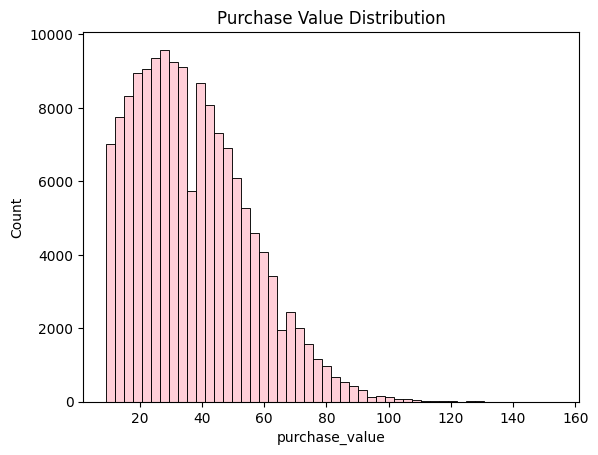

In [27]:
# Distribution Plot For purchase_value
sns.histplot(fraud_df["purchase_value"],bins=50,color="pink")
plt.title("Purchase Value Distribution")
plt.show()

* Insights From The Distribution of Purchase_value
  * Right-skewed distribution (positive skew)
  * Most purchases are concentrated at lower values
  * Fewer purchases at higher values

In [26]:
# check value count for class
fraud_df["class"].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

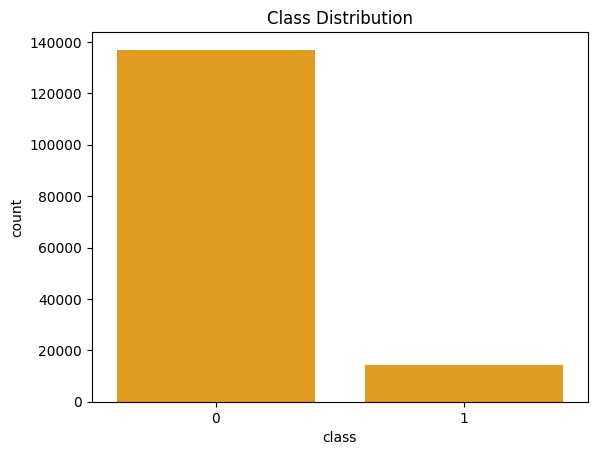

In [25]:
# Count Plot for class feature
sns.countplot(x='class',data=fraud_df ,color="orange")
plt.title("Class Distribution")
plt.show()

* Insights From the Count Plot For of Class
  * Non-fraudulent transactions dominate the dataset (tallest bar)
  * Fraudulent transactions are a tiny fraction (very short bar)
  * This is typical for fraud detection datasets - fraud is rare

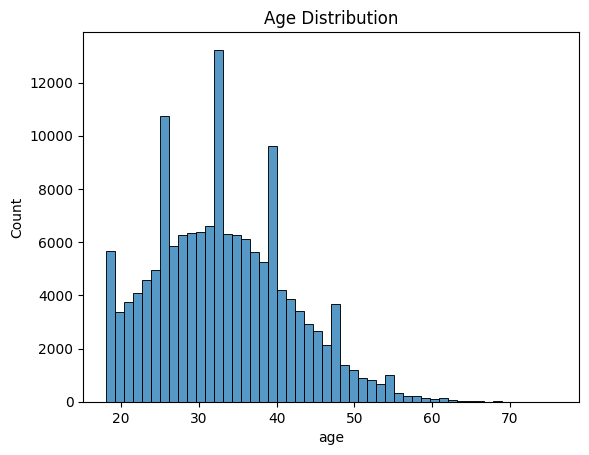

In [28]:
# Distribution plot for age 
sns.histplot(fraud_df['age'],bins=50)
plt.title("Age Distribution")
plt.show()

* Insights from age Disrtibution
  * Unimodal distribution with one clear peak
  * Approximately normal/bell-shaped but with right skew
  * Peak (mode) around age 30
  * Asymmetric: Steeper rise on left, gradual decline on right

#### B.Bivariate analysis

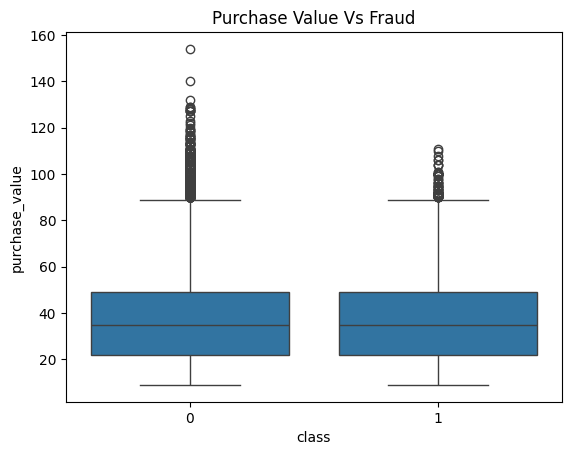

In [29]:
sns.boxplot(x='class', y='purchase_value',data=fraud_df)
plt.title('Purchase Value Vs Fraud')
plt.show()


* Key Insights from Purchase Value Vs Class Plot
  * Smaller transactions are more likely to be fraudulent
  * Fraudulent transactions cluster in lower value ranges (mostly < 40)
  * Large purchases (> 80) appear predominantly legitimate

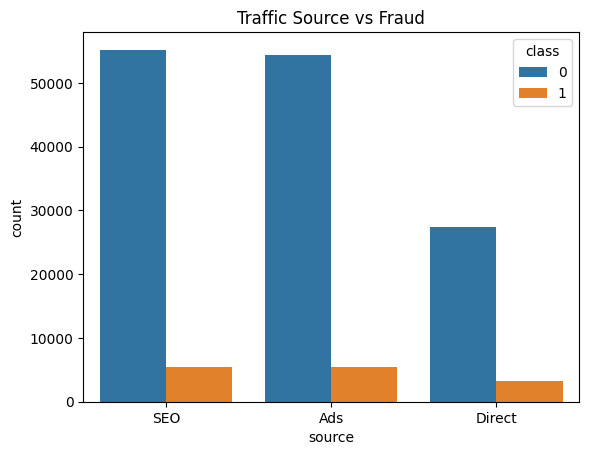

In [30]:
sns.countplot(x='source',hue='class', data=fraud_df)
plt.title("Traffic Source vs Fraud")
plt.show()


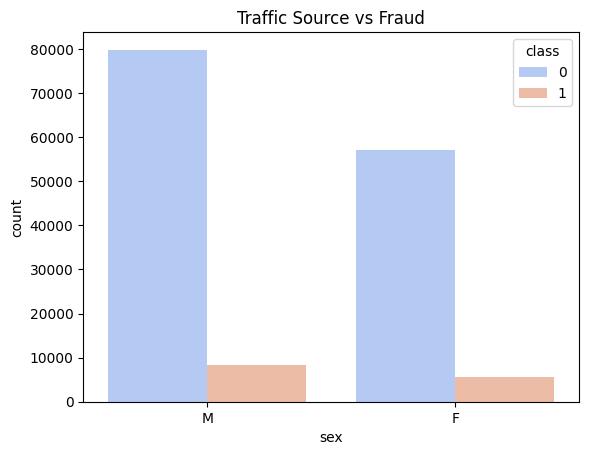

In [37]:
sns.countplot(x='sex',hue='class', data=fraud_df, palette='coolwarm')
plt.title("Traffic Source vs Fraud")
plt.show()

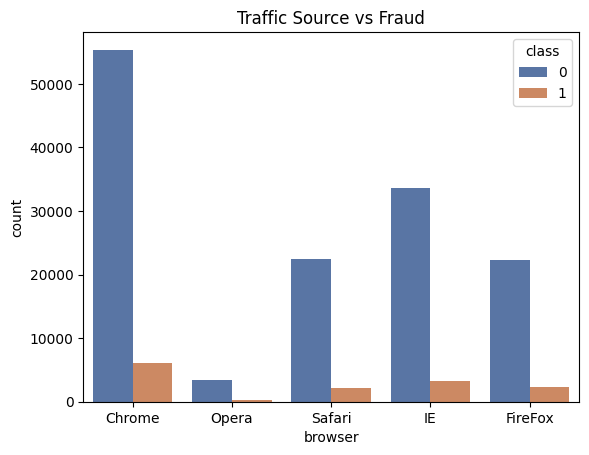

In [38]:
sns.countplot(x='browser',hue='class', data=fraud_df, palette='deep')
plt.title("Traffic Source vs Fraud")
plt.show()

#### C. Class Imbalance Quantification

In [31]:
# value count for class to quantify imbalance
fraud_df['class'].value_counts(normalize=True)*100

class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

* The dataset is highly imbalanced with fradulent transaction lessthan 10%